In [3]:
# Importing necessary libraries
# NumPy provides support for large, multi-dimensional arrays and matrices.
import numpy as np
# Pandas provides support for data manipulation and analysis.
import pandas as pd
# Matplotlib.pyplot is a plotting library in Python that provides a MATLAB-like interface for creating visualizations.
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv("CKD.csv")

In [30]:
data.shape

(399, 28)

In [5]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)
print(data.head(4))

   age         bp   al   su         bgr         bu        sc         sod  \
0  2.0  76.459948  3.0  0.0  148.112676  57.482105  3.077356  137.528754   
1  3.0  76.459948  2.0  0.0  148.112676  22.000000  0.700000  137.528754   
2  4.0  76.459948  1.0  0.0   99.000000  23.000000  0.600000  138.000000   
3  5.0  76.459948  1.0  0.0  148.112676  16.000000  0.700000  138.000000   

        pot       hrmo  ...  pc_normal  pcc_present  ba_present  htn_yes  \
0  4.627244  12.518156  ...          0            0           0        0   
1  4.627244  10.700000  ...          1            0           0        0   
2  4.400000  12.000000  ...          1            0           0        0   
3  3.200000   8.100000  ...          1            0           0        0   

   dm_yes  cad_yes  appet_yes  pe_yes  ane_yes  classification_yes  
0       0        0          1       1        0                   1  
1       0        0          1       0        0                   1  
2       0        0          1  

In [6]:
# Create the dependent variable (target)
dependent = data[["classification_yes"]]

In [7]:
# Check for missing values
print(data.isnull().sum())

age                   0
bp                    0
al                    0
su                    0
bgr                   0
bu                    0
sc                    0
sod                   0
pot                   0
hrmo                  0
pcv                   0
wc                    0
rc                    0
sg_b                  0
sg_c                  0
sg_d                  0
sg_e                  0
rbc_normal            0
pc_normal             0
pcc_present           0
ba_present            0
htn_yes               0
dm_yes                0
cad_yes               0
appet_yes             0
pe_yes                0
ane_yes               0
classification_yes    0
dtype: int64


In [8]:
# Check the distribution of the target variable
print(data['classification_yes'].value_counts())

1    249
0    150
Name: classification_yes, dtype: int64


In [9]:
# Create the independent variables (features)
independent = data[['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes']]
independent.columns

Index(['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes'],
      dtype='object')

In [10]:
# Importing train_test_split from sklearn.model_selection
# This function is used for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [11]:
# Splitting data into training and testing sets
# Train and test split ratio is 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [12]:
X_train[1:5]

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes
223,57.0,80.0,0.0,0.0,133.0,48.0,1.2,147.0,4.3,14.8,...,1,1,0,0,0,0,0,1,0,0
234,59.0,100.0,4.0,2.0,255.0,132.0,12.8,135.0,5.7,7.3,...,1,1,0,0,1,1,1,1,0,1
232,59.0,70.0,0.0,0.0,204.0,34.0,1.5,124.0,4.1,9.8,...,1,1,0,0,0,1,0,1,0,0
336,70.0,80.0,0.0,0.0,158.0,85.0,3.2,141.0,3.5,10.1,...,1,1,0,0,1,0,0,1,1,0


In [13]:
y_test.head()

,classification_yes
132,0
309,1
334,0
196,1
246,1


In [14]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Importing GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [17]:
# Define the parameter grid for GridSearchCV
parameter_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [18]:
# Initialize GridSearchCV with f1_macro scoring
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameter_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1_macro')

In [19]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=2)

In [20]:
# Print the best hyperparameters found by GridSearchCV
best_random_forest  = grid_search.best_estimator_
best_random_forest

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [21]:
# Predict on the test set
test_predictions = best_random_forest.predict(X_test)

In [22]:
# Retrieve cross-validation results
cv_results = grid_search.cv_results_


In [23]:
# Importing necessary libraries for evaluation metrics
from sklearn.metrics import confusion_matrix  # Importing confusion matrix to evaluate classification performance
from sklearn.metrics import classification_report  # Importing classification report to summarize classification performance
from sklearn.metrics import roc_curve, roc_auc_score  # Importing ROC curve and AUC score for binary classification evaluation

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[44  1]
 [ 1 74]]


In [25]:
#Classification report
classification_rep = classification_report(y_test, test_predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.99      0.99      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [26]:
# ROC AUC score
test_probabilities = best_random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, test_probabilities)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9997037037037036


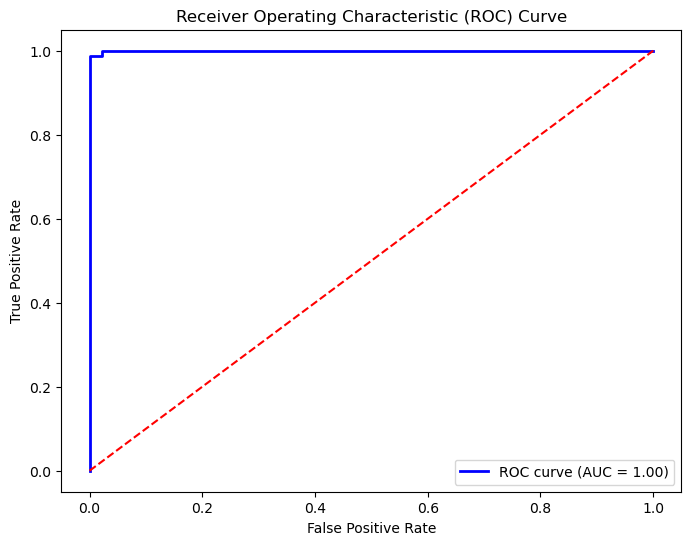

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, test_probabilities)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
